In [3]:
import pandas as pd

df = pd.read_csv("C:\\Users\\tiyas\\Desktop\\My learning (Data Science)\\Projects\\TCGA-BRCA_Treatment_Prediction\\data_cleaned.csv")
df

,age_at_diagnosis,ajcc_pathologic_stage,treatment_or_therapy,consistent_pathology_review,cancer_category_Highly Aggressive & Rare,cancer_category_Invasive Ductal Carcinoma (IDC),cancer_category_Invasive Lobular Carcinoma (ILC),cancer_category_Rare Subtypes,cancer_category_Slow-Growing & Favorable Prognosis,cancer_category_Special Invasive Carcinomas,...,diagnosis_method_category_Needle Biopsy,diagnosis_method_category_Surgical Diagnosis,icd_category_Lower Breast Quadrant Cancer,icd_category_Overlapping or Multiple Quadrants,icd_category_Upper Breast Quadrant Cancer,treatment_category_Chemotherapy,treatment_category_Hormone Therapy,treatment_category_Radiation Therapy,treatment_category_Surgery & Ancillary Procedures,treatment_category_Targeted & Immunotherapy
0,61.0,1,0,1,False,True,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
1,61.0,1,1,1,False,True,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False
2,61.0,1,1,1,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
3,71.0,0,1,1,False,False,False,False,False,True,...,True,False,False,False,False,False,False,False,True,False
4,50.0,5,1,1,False,False,False,False,False,True,...,True,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4411,71.0,4,1,1,False,False,True,False,False,False,...,False,True,False,False,False,False,True,False,False,False
4412,59.0,5,1,1,False,True,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False
4413,59.0,5,0,1,False,True,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
4414,59.0,5,1,1,False,True,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False


In [4]:
min_age = df['age_at_diagnosis'].min()
max_age = df['age_at_diagnosis'].max()

print(f"Range of age_at_diagnosis: {min_age} to {max_age}")

Range of age_at_diagnosis: 27.0 to 90.0


In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Apply Min-Max Scaling
df['age_at_diagnosis'] = scaler.fit_transform(df[['age_at_diagnosis']])

# Print the new range
min_val = df['age_at_diagnosis'].min()
max_val = df['age_at_diagnosis'].max()

print(f"Normalized Range of age_at_diagnosis: {min_val} to {max_val}")

Normalized Range of age_at_diagnosis: 0.0 to 0.9999999999999998


## Handling Class Imbalance

In [7]:
df['treatment_or_therapy'].value_counts()

treatment_or_therapy
1    3904
0     512
Name: count, dtype: int64

In [8]:
# Extract features and target
X = df.drop('treatment_or_therapy', axis='columns')
y = df['treatment_or_therapy']

### SMOTE (Synthetic Minority Over-sampling Technique):
SMOTE is an oversampling technique used to address class imbalances in datasets. Instead of simply duplicating the minority class samples, it generates synthetic examples to balance the dataset.

#### Step-by-Step Process:
**1. Identify the Minority Class:** In my dataset, the target variable (treatment_or_therapy) has an imbalance. Hence, SMOTE generates synthetic samples to increase the count of class 0.
- 1 (Majority class) → 3904 instances
- 0 (Minority class) → 512 instances

**2. Find k Nearest Neighbors:**
- For each minority class instance, SMOTE selects its k nearest neighbors (by default, k=5) based on feature space similarity (Euclidean distance).

**3. Generate Synthetic Samples:**
- Instead of duplicating existing points, SMOTE creates new synthetic data points by interpolating between the chosen instance and one of its nearest neighbors.
- The formula for a new sample is:

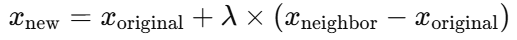

where 𝜆 is a random number between 0 and 1.

**4. Repeat Until the Minority Class is Balanced:**
- SMOTE continues this process until the minority class is balanced with the majority class.

In [10]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to handle class imbalance
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_sm, y_sm = smote.fit_resample(X, y)

print(y_sm.value_counts())

treatment_or_therapy
0    3904
1    3904
Name: count, dtype: int64


## Model Train/Test Split

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42, stratify=y_sm)

## Feature Selection

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier()
model.fit(X_train, y_train)
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
print(feature_importance.sort_values(ascending=False))

scores = cross_val_score(model, X_train, y_train, cv=5)
print(f"Mean CV Accuracy: {scores.mean():.4f}")

age_at_diagnosis                                      0.357614
treatment_category_Radiation Therapy                  0.264368
ajcc_pathologic_stage                                 0.106417
treatment_category_Surgery & Ancillary Procedures     0.076624
treatment_category_Hormone Therapy                    0.056086
treatment_category_Chemotherapy                       0.051580
diagnosis_method_category_Surgical Diagnosis          0.024698
diagnosis_method_category_Needle Biopsy               0.018315
cancer_category_Invasive Ductal Carcinoma (IDC)       0.010654
cancer_category_Invasive Lobular Carcinoma (ILC)      0.008272
cancer_category_Highly Aggressive & Rare              0.006397
diagnosis_method_category_General Biopsy              0.005739
cancer_category_Slow-Growing & Favorable Prognosis    0.004254
treatment_category_Targeted & Immunotherapy           0.003950
cancer_category_Rare Subtypes                         0.002694
icd_category_Lower Breast Quadrant Cancer             0

In [15]:
from sklearn.metrics import accuracy_score, classification_report

# Predictions and evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Test Accuracy: 0.9149
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       781
           1       0.91      0.92      0.92       781

    accuracy                           0.91      1562
   macro avg       0.91      0.91      0.91      1562
weighted avg       0.91      0.91      0.91      1562



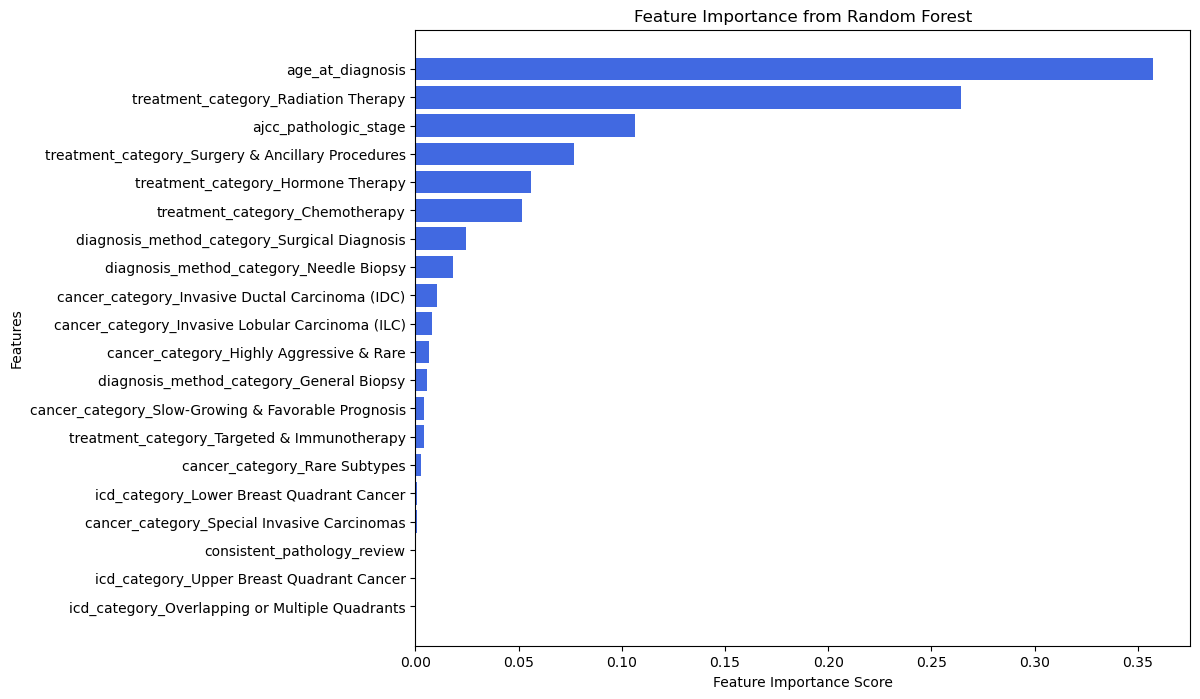

In [16]:
import matplotlib.pyplot as plt

# Sort feature importance values
feature_importance_sorted = feature_importance.sort_values(ascending=True)

# Plot Feature Importances
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_sorted.index, feature_importance_sorted.values, color='royalblue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance from Random Forest")
plt.show()

In [17]:
features_to_drop = [
    "cancer_category_Special Invasive Carcinomas",
    "icd_category_Lower Breast Quadrant Cancer",
    "consistent_pathology_review",
    "icd_category_Upper Breast Quadrant Cancer",
    "icd_category_Overlapping or Multiple Quadrants",
]

df = df.drop(columns=features_to_drop)

In [18]:
df.to_csv("data_preprocessed.csv", index=False)